# ChinaPV : Vectorized Solar PV Dataset (2015 & 2020)

The **ChinaPV Dataset** (Liu et al., 2024) is a vectorized geospatial dataset of solar photovoltaic (PV) installations across China for the years **2015** and **2020**.

- Developed using **Landsat-8 Surface Reflectance** imagery (30 m resolution) on the **Google Earth Engine (GEE)** platform.
- PV detection was performed using a **Random Forest classifier** trained on:
  - **3,975 PV samples** (from a 2020 atlas and Google Earth Pro inspection),
  - **6,800 non-PV samples** (from ESA CCI-LC land cover products).
- The classification used 16 features:
  - 7 raw spectral bands (B1–B7),
  - 3 indices: **NDVI**, **NDBI**, **mNDWI**,
  - 6 texture metrics.
- Post-processing included:
  - **Morphological filtering** to remove noise,
  - **Manual visual corrections** using Google Earth Pro,
  - Masking based on **VIIRS nighttime light data** to focus on human-inhabited areas.
- Output includes vectorized **polygon shapefiles**, each with:
  - Centroid coordinates (lat/lon),
  - Area (km²),
  - Perimeter (km),
  - Province name,
  - Urban/rural classification.

- Overall Accuracy (OA):
  - **2020**: 99.06%
  - **2015**: 96.71% (model trained on 2020 data)


This dataset and its methodology are described in the following paper:
> **Liu, J., Wang, J., Li, L. (2024)**  
> *Vectorized solar photovoltaic installation dataset across China in 2015 and 2020*  
> *Scientific Data*, **11**, 1446  
> [https://doi.org/10.1038/s41597-024-04356-z](https://doi.org/10.1038/s41597-024-04356-z)


The dataset is publicly available on **Zenodo**:
> [ChinaPV Dataset on Zenodo](https://zenodo.org/record/14292571)


GitHub repository :
> [https://github.com/qingfengxitu/ChinaPV](https://github.com/qingfengxitu/ChinaPV)



# Setup

In [20]:
import os
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

## Download

In [5]:
categories = ["ChinaPV_2015_v1.1", "ChinaPV_2020_v1.1", "PV_test_samples"]
types = ["dbf", "prj", "sbn", "sbx", "shp", "shp.xml", "shx"]

for category in categories:
    output_folder = os.path.join("..", "..", "data", "raw_data","ChinaPV_vectorized",category)
    os.makedirs(output_folder, exist_ok=True)

    print(f"Downloading {category}...")
    for ext in types:
        url = f"https://zenodo.org/records/14292571/files/{category}.{ext}?download=1"

        filename = f"{category}.{ext}"
        filepath = os.path.join(output_folder, filename)

        response = requests.get(url)
        if response.status_code == 200:
            with open(filepath, "wb") as f:
                f.write(response.content)
            print(f"✅ Downloaded: {filepath}")
        else:
            print(f"❌ Failed to download: {filename} (status {response.status_code})")

✅ Downloaded: ..\..\data\raw_data\ChinaPV_vectorized\ChinaPV_2015_v1.1\ChinaPV_2015_v1.1.dbf
✅ Downloaded: ..\..\data\raw_data\ChinaPV_vectorized\ChinaPV_2015_v1.1\ChinaPV_2015_v1.1.prj
✅ Downloaded: ..\..\data\raw_data\ChinaPV_vectorized\ChinaPV_2015_v1.1\ChinaPV_2015_v1.1.sbn
✅ Downloaded: ..\..\data\raw_data\ChinaPV_vectorized\ChinaPV_2015_v1.1\ChinaPV_2015_v1.1.sbx
✅ Downloaded: ..\..\data\raw_data\ChinaPV_vectorized\ChinaPV_2015_v1.1\ChinaPV_2015_v1.1.shp
✅ Downloaded: ..\..\data\raw_data\ChinaPV_vectorized\ChinaPV_2015_v1.1\ChinaPV_2015_v1.1.shp.xml
✅ Downloaded: ..\..\data\raw_data\ChinaPV_vectorized\ChinaPV_2015_v1.1\ChinaPV_2015_v1.1.shx
✅ Downloaded: ..\..\data\raw_data\ChinaPV_vectorized\ChinaPV_2020_v1.1\ChinaPV_2020_v1.1.dbf
✅ Downloaded: ..\..\data\raw_data\ChinaPV_vectorized\ChinaPV_2020_v1.1\ChinaPV_2020_v1.1.prj
✅ Downloaded: ..\..\data\raw_data\ChinaPV_vectorized\ChinaPV_2020_v1.1\ChinaPV_2020_v1.1.sbn
✅ Downloaded: ..\..\data\raw_data\ChinaPV_vectorized\ChinaPV_2020_

## Clean

In [57]:
gdf_2015 = gpd.read_file("../../data/raw_data/ChinaPV_vectorized/ChinaPV_2015_v1.1/ChinaPV_2015_v1.1.shp")
gdf_2020 = gpd.read_file("../../data/raw_data/ChinaPV_vectorized/ChinaPV_2020_v1.1/ChinaPV_2020_v1.1.shp")

In [58]:
print("2015")
print(gdf_2015.head())
gdf_2015.info()

2015
       Lat      Lon  Perimeter      Area  Province  urban  \
0  41.9158  120.582   3.728593  0.184040  Liaoning      0   
1  41.7279  120.270   0.959408  0.048780  Liaoning      0   
2  41.7258  120.273   1.041206  0.047373  Liaoning      0   
3  41.5951  120.299   3.199601  0.181921  Liaoning      0   
4  42.8203  122.458   2.148753  0.239232  Liaoning      0   

                                            geometry  
0  POLYGON Z ((120.58 41.917 0, 120.58 41.917 0, ...  
1  POLYGON Z ((120.27 41.729 0, 120.27 41.728 0, ...  
2  POLYGON Z ((120.27 41.727 0, 120.27 41.726 0, ...  
3  POLYGON Z ((120.3 41.596 0, 120.3 41.596 0, 12...  
4  POLYGON Z ((122.46 42.819 0, 122.46 42.818 0, ...  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Lat        1645 non-null   float64 
 1   Lon        1645 non-null   float64 
 2   Perimeter  1645

In [59]:
print("2020")
print(gdf_2020.head())
gdf_2020.info()

2020
       Lat      Lon   Province      Area  Perimeter  urban  \
0  24.1182  120.426     Taiwan  1.648512   5.121950      0   
1  20.2728  110.076  Guangdong  0.125889   2.487443      0   
2  21.0636  110.312  Guangdong  1.081447   5.824587      0   
3  21.0744  110.308  Guangdong  0.550213   3.724926      0   
4  38.0905  118.405   Shandong  0.134557   2.417814      0   

                                            geometry  
0  POLYGON Z ((120.43 24.113 0, 120.43 24.113 0, ...  
1  POLYGON Z ((110.08 20.269 0, 110.08 20.269 0, ...  
2  POLYGON Z ((110.31 21.069 0, 110.31 21.067 0, ...  
3  POLYGON Z ((110.31 21.077 0, 110.31 21.077 0, ...  
4  POLYGON Z ((118.4 38.087 0, 118.4 38.087 0, 11...  
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10985 entries, 0 to 10984
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Lat        10985 non-null  float64 
 1   Lon        10985 non-null  float64 
 2   Provinc

### Rename columns for consistency

In [ ]:
gdf_2015 = gdf_2015.rename(columns={
    "Lat": "Latitude",
    "Lon": "Longitude"
})

gdf_2020 = gdf_2020.rename(columns={
    "Lat": "Latitude",
    "Lon": "Longitude"
})

### Filter data 

In [80]:
print("Provinces in ChinaPV_2015:", gdf_2015['Province'].sort_values().unique())
print("\n")
print("Provinces in ChinaPV_2020:", gdf_2020['Province'].sort_values().unique())

Provinces in ChinaPV_2015: ['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hubei' 'Hunan'
 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Ningxia'
 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan' 'Tianjin'
 'Tibet' 'Xinjiang' 'Yunnan' 'Zhejiang']


Provinces in ChinaPV_2020: ['Anhui' 'Beijing' 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi'
 'Guizhou' 'Hainan' 'Hebei' 'Heilongjiang' 'Henan' 'Hubei' 'Hunan'
 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Ningxia'
 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan' 'Tianjin'
 'Tibet' 'Xinjiang' 'Yunnan' 'Zhejiang']


We aim to focus exclusively on mainland China. To ensure a fair and consistent comparison, we will remove data related to Taiwan.

In [74]:
gdf_2015 = gdf_2015[gdf_2015['Province'] != 'Taiwan']
gdf_2020 = gdf_2020[gdf_2020['Province'] != 'Taiwan']

### Save the cleaned dataset

In [81]:
# Save as a new GeoJSON (easier to manipulate with python in the future)
gdf_2015.to_file("../../data/data_processed/chinapv_vectorized_2015.geojson", driver="GeoJSON")
gdf_2020.to_file("../../data/data_processed/chinapv_vectorized_2020.geojson", driver="GeoJSON")

## Exploratory Analysis

### Comparaison between 2015 and 2020

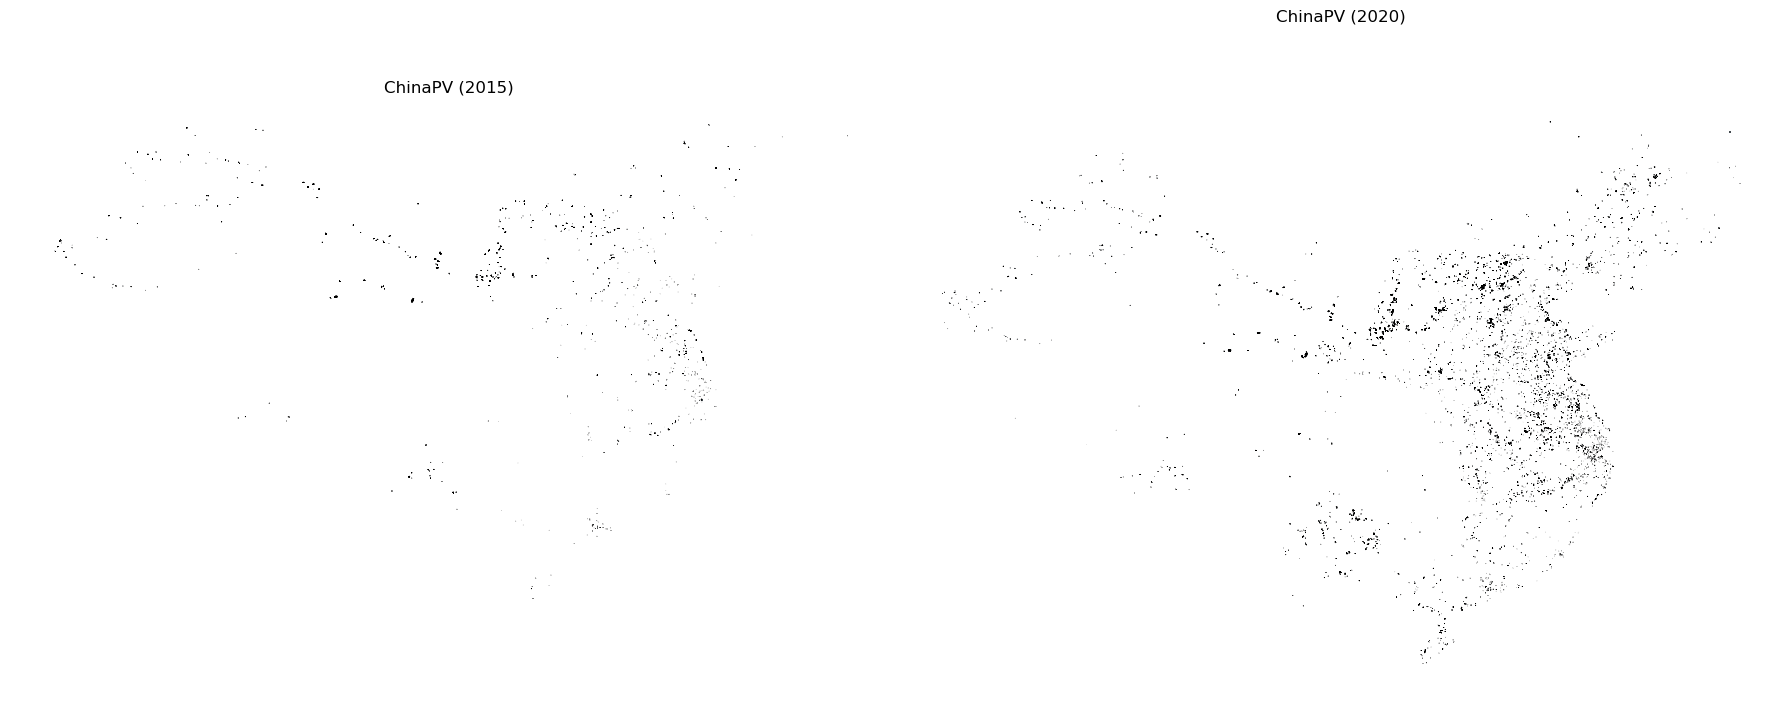

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Map for 2015
gdf_2015.plot(ax=axes[0], edgecolor="black", linewidth=0.5)
axes[0].set_title("ChinaPV (2015)")
axes[0].axis("off")

# Map for 2020
gdf_2020.plot(ax=axes[1], edgecolor="black", linewidth=0.5)
axes[1].set_title("ChinaPV (2020)")
axes[1].axis("off")

plt.tight_layout()
plt.show()



In [83]:
# Group by province and compute total count and area
agg_2015 = gdf_2015.groupby("Province").agg(
    num_installations_2015=("geometry", "count"),
    total_area_2015=("Area", "sum")
).reset_index()

agg_2020 = gdf_2020.groupby("Province").agg(
    num_installations_2020=("geometry", "count"),
    total_area_2020=("Area", "sum")
).reset_index()

# Merge for comparison
df_compare = pd.merge(agg_2015, agg_2020, on="Province", how="outer").fillna(0)
df_compare["area_growth_%"] = 100 * (df_compare["total_area_2020"] - df_compare["total_area_2015"]) / df_compare["total_area_2015"].replace(0, pd.NA)
df_compare["num_growth_%"] = 100 * (df_compare["num_installations_2020"] - df_compare["num_installations_2015"]) / df_compare["num_installations_2015"].replace(0, pd.NA)

# Sort by largest growth
df_compare_sorted = df_compare.sort_values("total_area_2020", ascending=False)
df_compare_sorted


,Province,num_installations_2015,total_area_2015,num_installations_2020,total_area_2020,area_growth_%,num_growth_%
20,Qinghai,74,101.127727,187,285.453135,182.269900,152.702703
28,Xinjiang,118,114.354704,269,258.065524,125.671106,127.966102
14,Inner Mongolia,139,84.709202,418,249.174098,194.152336,200.719424
19,Ningxia,122,64.586377,265,209.351055,224.141198,117.213115
4,Gansu,120,119.522642,220,196.375470,64.299807,83.333333
9,Hebei,118,28.931572,1020,185.343444,540.626931,764.406780
22,Shandong,117,10.369442,868,147.551842,1322.948774,641.880342
21,Shaanxi,20,12.574719,317,140.962524,1020.999386,1485.000000
15,Jiangsu,176,39.417117,884,139.190515,253.122006,402.272727
24,Shanxi,42,16.660067,858,136.562119,719.697313,1942.857143


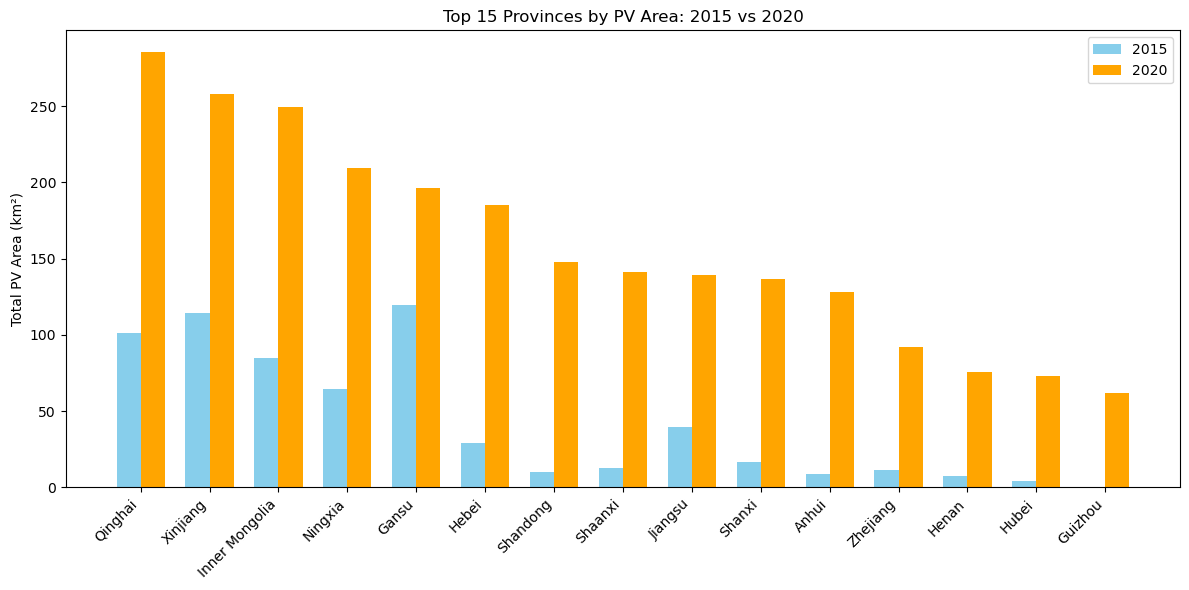

In [84]:
top_n = 15
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

df_top = df_compare_sorted.head(top_n)

bar_width = 0.35
x = range(top_n)

ax.bar(x, df_top["total_area_2015"], width=bar_width, label="2015", color='skyblue')
ax.bar([i + bar_width for i in x], df_top["total_area_2020"], width=bar_width, label="2020", color='orange')

ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(df_top["Province"], rotation=45, ha="right")
ax.set_ylabel("Total PV Area (km²)")
ax.set_title("Top 15 Provinces by PV Area: 2015 vs 2020")
ax.legend()
plt.tight_layout()
plt.show()


In [85]:
china_admin = gpd.read_file("../../data/data_processed/mapdata/gadm41_CHN_3_processed.json")
gdf = china_admin.dissolve(by="Province", as_index=False)  # dissolve to province level
gdf = gdf.merge(df_compare, on="Province", how="left").fillna(0)

C:\Users\charl\AppData\Local\Temp\ipykernel_8032\3546449301.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gdf = gdf.merge(df_compare, on="Province", how="left").fillna(0)


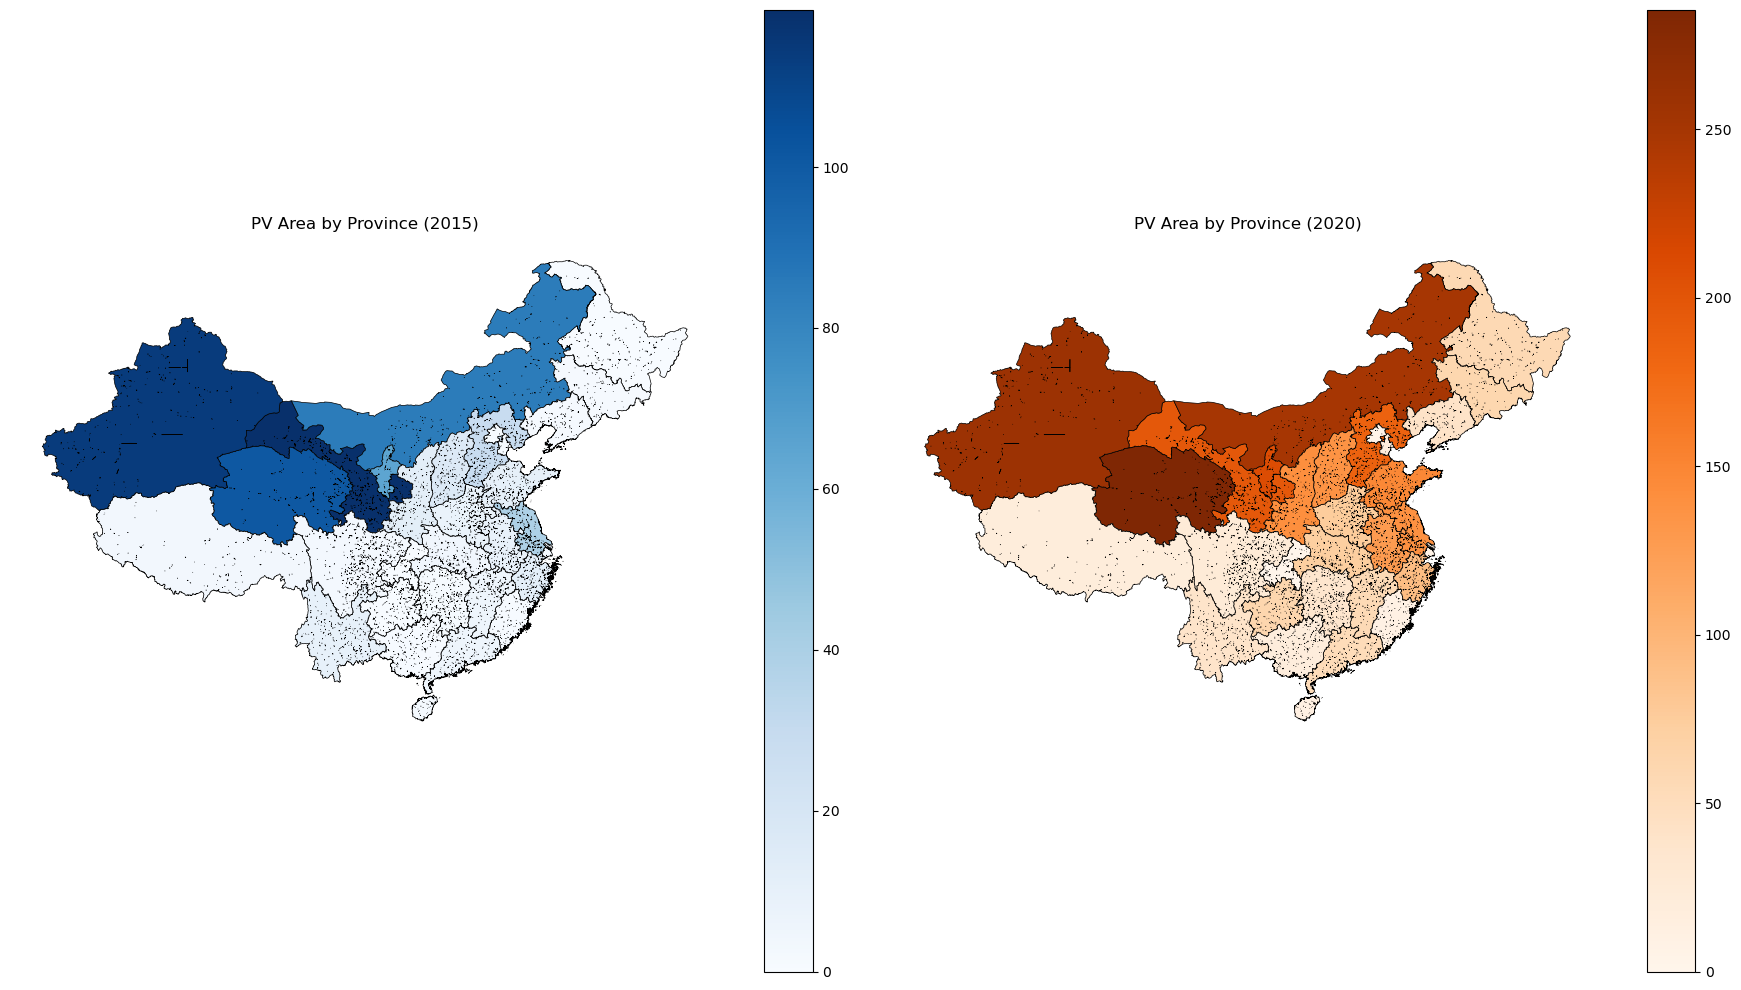

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Map for 2015
gdf.plot(
    column="total_area_2015",
    cmap="Blues",
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    ax=axes[0]
)
axes[0].set_title("PV Area by Province (2015)")
axes[0].axis("off")

# Map for 2020
gdf.plot(
    column="total_area_2020",
    cmap="Oranges",
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    ax=axes[1]
)
axes[1].set_title("PV Area by Province (2020)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


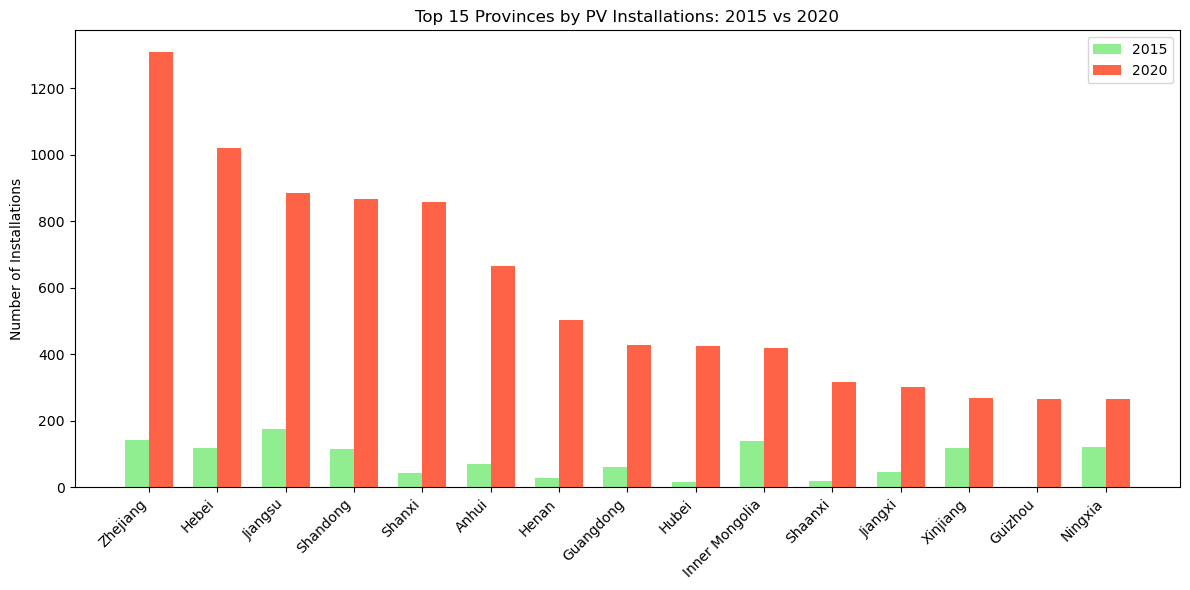

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

df_top = df_compare.sort_values("num_installations_2020", ascending=False).head(top_n)

ax.bar(x, df_top["num_installations_2015"], width=bar_width, label="2015", color='lightgreen')
ax.bar([i + bar_width for i in x], df_top["num_installations_2020"], width=bar_width, label="2020", color='tomato')

ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(df_top["Province"], rotation=45, ha="right")
ax.set_ylabel("Number of Installations")
ax.set_title("Top 15 Provinces by PV Installations: 2015 vs 2020")
ax.legend()
plt.tight_layout()
plt.show()
